# County Region Mapping Calculations

## Assigning Colorado Counties to Regions Using KMeans Clustering

### Introduction

The purpose of this code is to group the counties of Colorado into 9 distinct regions. Given that Colorado has more than 9 counties, we need a strategy to group multiple counties into a single region. We use the KMeans clustering algorithm to achieve this. 

### How it Works

1. **Data Retrieval**: 
    - We start by loading geographic data for all US counties from a given URL.
    - From this dataset, we filter out only the counties of Colorado using the state code `08`.

2. **Reprojection**:
    - The geographic data is originally in a latitude-longitude format, which isn't ideal for spatial distance calculations. Hence, we reproject (convert) this data to UTM Zone 13N (`EPSG:26913`), which is more suitable for Colorado.
    - This transformation ensures that the distance computations, which KMeans uses internally, are accurate.

3. **Centroid Calculation**:
    - For each county, we calculate the centroid, which is essentially the geographic center point of the county.
    - The centroids provide a single point representation for each county, simplifying our clustering task.

4. **KMeans Clustering**:
    - We feed the centroid coordinates of each county to the KMeans algorithm. 
    - KMeans will try to group the counties into 9 clusters (regions) such that the sum of the squared distances between the counties' centroids and the center of their respective clusters is minimized.
    - Each county is then assigned a `region_id` based on which of the 9 clusters it belongs to.
    


### Result

At the end of this process, each county in Colorado is assigned to one of 9 regions. The result is a table of counties with their associated `region_id`, which represents the region they belong to.

---

You can use this markdown content to describe the process in any documentation or report you're preparing.

# Algorithm Explained


## 1. Initialization:
Choose **k** initial cluster centers. There are various methods to initialize these centers, but a common method is the "Forgy" method where **k** observations are chosen randomly from the dataset to serve as the initial centers.

$$ C^{(0)}_i \quad \text{for} \quad i = 1, \ldots, k $$

where $ C^{(0)}_i $ is the $ i^{th} $ initial cluster center.

## 2. Assignment:
Assign each observation to the nearest cluster center. Let $ x_j $ be the $ j^{th} $ observation, then the cluster $ r_j $ to which $ x_j $ is assigned is given by:

$$ r_j = \underset{i}{\text{argmin}} \ \| x_j - C^{(t)}_i \|^2 $$

where $ C^{(t)}_i $ is the $ i^{th} $ cluster center at iteration $ t $.

## 3. Update:
Recalculate cluster centers as the mean of all the observations assigned to each cluster.

$$ C^{(t+1)}_i = \frac{1}{|S_i|} \sum_{x_j \in S_i} x_j $$

where $ S_i $ is the set of all observations assigned to the $ i^{th} $ cluster.

## 4. Convergence:
Repeat the Assignment and Update steps until the cluster centers no longer change (or change very little) between iterations.

The primary objective of k-means clustering is to minimize the within-cluster sum of squares (WCSS):

$$ WCSS = \sum_{i=1}^{k} \sum_{x_j \in S_i} \| x_j - C_i \|^2 $$

The algorithm aims to find cluster centers $ C_i $ that minimize the WCSS.


### Install Dependencies

In [1]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


Geographical Proximity: Use geospatial libraries like geopandas and shapely to group counties based on their proximity and boundaries.

In [4]:
import geopandas as gpd
from sklearn.cluster import KMeans

# Load Colorado counties
colorado_counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_20m.zip")
colorado_counties = colorado_counties[colorado_counties['STATEFP'] == '08']

# Reproject to UTM Zone 13N
colorado_counties = colorado_counties.to_crs(epsg=26913)

# Get centroids of each county
colorado_counties["centroid_lon"] = colorado_counties.geometry.centroid.x
colorado_counties["centroid_lat"] = colorado_counties.geometry.centroid.y

# Use K-means clustering to group the counties based on their centroids
X = colorado_counties[["centroid_lon", "centroid_lat"]].values
kmeans = KMeans(n_clusters=9, random_state=0).fit(X)
colorado_counties["region_id"] = kmeans.labels_

print(colorado_counties[["NAME", "region_id"]])


            NAME  region_id
1           Yuma          3
73      San Juan          0
89          Baca          4
125      Prowers          4
134       Custer          5
...          ...        ...
2822    La Plata          0
2895      Morgan          3
2928       Routt          6
3008    Costilla          5
3096  Washington          3

[64 rows x 2 columns]


## Visual Representation

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry', 'centroid_lon', 'centroid_lat', 'region_id'],
      dtype='object')


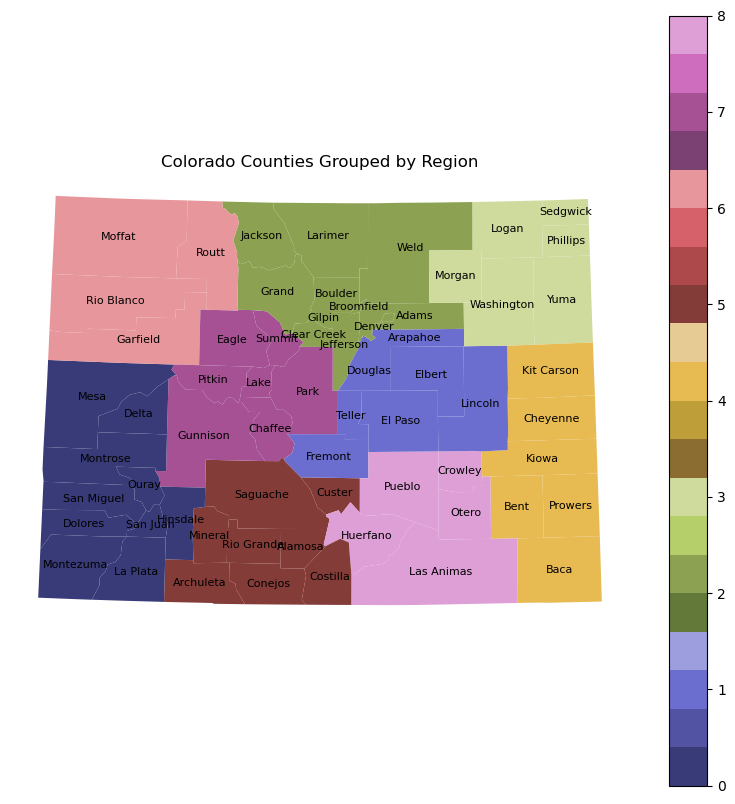

In [5]:
import matplotlib.pyplot as plt

# Assuming 'region_id' column in colorado_counties is the result of your KMeans clustering
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title("Colorado Counties Grouped by Region")

print(colorado_counties.columns)


# Plot each region with a unique color
colorado_counties.plot(column='region_id', ax=ax, legend=True, cmap='tab20b')

# Annotate each county with its name
for x, y, label in zip(colorado_counties["centroid_lon"], colorado_counties["centroid_lat"], colorado_counties["NAME"]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')


# Removing x and y axis for better visualization
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show the plot
plt.show()


## Export As CSV

This CSV must be formatted to the county reigon map:

In [8]:
# Extract the county names and their corresponding region IDs directly
data = [(row['NAME'], row['region_id'] + 1) for _, row in colorado_counties.iterrows()]

# Export to CSV
filename = 'county_region_map_calculated.csv'
with open(filename, 'w') as csvfile:
    # No header row needed based on your new format request
    for county, region in data:
        csvfile.write(f"'{county}',{region}\n")

print(f"Data saved to {filename}")


Data saved to county_region_map_calculated.csv


# Data Migration Script

### Installing Dependencies

In [2]:
pip install pymysql pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 198.7 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: /Users/ishangohil/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


The cell below is a template for connecting it to actual db host.

In [1]:
import pymysql
import pandas as pd

# Connect to the database
connection = pymysql.connect(host='your_host',
                             user='your_user',
                             password='your_password',
                             db='your_db')

# Extract data into pandas DataFrames
query_member = "SELECT * FROM member;"
query_region = "SELECT * FROM region;"
query_county_region_map = "SELECT * FROM county_region_map;"

df_member = pd.read_sql(query_member, connection)
df_region = pd.read_sql(query_region, connection)
df_county_region_map = pd.read_sql(query_county_region_map, connection)

# Transform data
# Here you would manipulate the data in df_member and other dataframes 
# based on your requirements. pandas provides functions like 'apply', 
# 'merge', and others to help in the transformation.

# Example transformation:
# Extract county from 'locations' column and merge it with df_county_region_map
df_member['county'] = df_member['locations'].apply(lambda x: x.get('county'))
df_transformed = pd.merge(df_member, df_county_region_map, on='county', how='left')

# Load back into MySQL
cursor = connection.cursor()

# Loop through the DataFrame rows and insert into the member_region table
for index, row in df_transformed.iterrows():
    cursor.execute("INSERT INTO member_region (member_id, region_id) VALUES (%s, %s)", (row['id'], row['regionId']))

connection.commit()
cursor.close()
connection.close()


OperationalError: (2003, "Can't connect to MySQL server on 'your_host' ([Errno 8] nodename nor servname provided, or not known)")

# Personal Test

In [1]:
import pandas as pd
import pymysql
import json
import csv
import logging

# Setting up logging
logging.basicConfig(filename="migration_log.log", level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Connect to the database
try:
    connection = pymysql.connect(host='',
                                 user='',
                                 password='',
                                 db='',
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
    logging.info("Successfully connected to the database.")
except Exception as e:
    logging.error(f"Failed to connect to the database. Error: {str(e)}")
    exit()

# Load the CSV into DataFrame
mapping = []
try:
    with open('county_region_map_calculated.csv', 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            mapping.append((row[0].strip("' "), int(row[1].strip())))
    
    county_region_df = pd.DataFrame(mapping, columns=['county', 'region_id'])
    logging.info("Successfully loaded CSV into DataFrame.")
except Exception as e:
    logging.error(f"Failed to load CSV. Error: {str(e)}")
    exit()

def get_region_ids_from_locations(locations_json):
    if locations_json.get("SA Locations"):
        return list(county_region_df['region_id'])

    region_ids = []
    for county in county_region_df['county']:
        if county in locations_json:
            region_id = county_region_df[county_region_df['county'] == county]['region_id'].values[0]
            region_ids.append(region_id)

    return region_ids

# Fetch member locations and update member_region table
with connection.cursor() as cursor:
    try:
        cursor.execute("SELECT id, locations FROM member")
        for row in cursor.fetchall():
            member_id = row['id']
            locations = json.loads(row['locations'])
            region_ids = get_region_ids_from_locations(locations)
            
            for region_id in region_ids:
                cursor.execute("INSERT INTO member_region (member_id, region_id) VALUES (%s, %s)", (member_id, region_id))
        logging.info("Successfully updated member_region table.")
    except Exception as e:
        logging.error(f"Error while updating member_region table. Error: {str(e)}")

# Do the same for organizations (assuming their locations column is named 'service_locations')
with connection.cursor() as cursor:
    try:
        cursor.execute("SELECT id, service_locations FROM organization")
        for row in cursor.fetchall():
            org_id = row['id']
            locations = json.loads(row['service_locations'])
            region_ids = get_region_ids_from_locations(locations)
            
            for region_id in region_ids:
                cursor.execute("INSERT INTO organization_region (organization_id, region_id) VALUES (%s, %s)", (org_id, region_id))
        logging.info("Successfully updated organization_region table.")
    except Exception as e:
        logging.error(f"Error while updating organization_region table. Error: {str(e)}")

# Commit changes and close the connection
try:
    connection.commit()
    connection.close()
    logging.info("Successfully committed changes and closed the connection.")
except Exception as e:
    logging.error(f"Failed to commit changes or close the connection. Error: {str(e)}")


# Data Diagnostics

In [7]:
print(df_transformed.head())
print(df_transformed['locations'].isnull().sum())
print(df_transformed['locations'].apply(type).value_counts())
print(df_transformed['county'].unique())
print(f"Original member dataframe shape: {df_member.shape}")
print(f"Transformed dataframe shape: {df_transformed.shape}")



   id_x first_name last_name                         email  \
0     1    Spencer    Wegner             spencer@bevara.co   
1     5      Jacob   Brondum  jacobthomasbrondum@gmail.com   
2     6     Talley      Cain             tcain37@gmail.com   
3     7      Sarah   Brondum             sarah+2@bevara.co   
4     8    Bridger   Kroenke             bkroenke@mric.net   

                                            password  \
0  119ee1b4218322bb0bc4d22621561e6aca35a7b116a4c6...   
1  9faafdc21afd79990173a8ed39242e9410600751aef171...   
2  94e09a6742d3068de1a2aed8f6eb6f28af7cc9d5761347...   
3  aa83c29832c117321c917480e936fc613acf908fc6827d...   
4  0dd90d09d0d5c8430130dd9df52c99d68305b5f7e23dd2...   

                                                salt    age date_of_birth  \
0  102aaddf4c561ac4494de1b389a30c5840ba66513295ff...  25-34          None   
1  5481ab2de72227d9f0a673791bfd7d81fc6d309315e636...  18-24          None   
2  b553657e8c4baf4a13b083ef362079c294cd90ed9336a3...  18-24

In [2]:
pip install geopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: /Users/ishangohil/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Location Conversion

In [2]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="BEV-359")

def get_county_from_address(address):
    try:
        location = geolocator.geocode(address)
        if location:
            address_parts = location.address.split(',')
            for part in address_parts:
                if "County" in part:
                    return part.strip()
        return None
    except Exception as e:
        print(f"Error occurred: {e}. Retrying after 5 seconds.")
        time.sleep(5)
        return get_county_from_address(address)

address = "Goat Patch Brewing"
county = get_county_from_address(address)
print(county)


El Paso County


# URL Decoding

In [1]:
import requests
from urllib.parse import unquote

def expand_google_maps_url(short_url):
    # Get the redirect URL without actually downloading or processing it
    response = requests.get(short_url, allow_redirects=False)
    
    if response.status_code == 302 and 'Location' in response.headers:
        # URL decode (e.g., convert "%20" to space)
        return unquote(response.headers['Location'])
    return None

short_url = 'https://goo.gl/maps/iBjPqWTocXrisHER7'
expanded_url = expand_google_maps_url(short_url)

if expanded_url:
    print("Expanded URL:", expanded_url)
else:
    print("Couldn't expand the URL.")


Expanded URL: https://www.google.com/maps/dir//39.7487835,-105.2448438/@39.7452006,-105.2467767,972m/data=!3m1!1e3!4m2!4m1!3e0?shorturl=1


# Events Migration

In [8]:
import pandas as pd
import pymysql
import json
import csv
import logging
import re
from geopy.geocoders import Nominatim
from urllib.parse import urlparse, parse_qs
import requests

# --- Setup ---

# Logging setup
logging.basicConfig(filename="migration_log.log", level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Connect to the database
try:
    connection = pymysql.connect(host='',
                                 user='',
                                 password='',
                                 db='',
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
    logging.info("Successfully connected to the database.")
except Exception as e:
    logging.error(f"Failed to connect to the database. Error: {str(e)}")
    exit()

# Load the CSV into DataFrame
try:
    with open('county_region_map_calculated.csv', 'r') as f:
        reader = csv.reader(f)
        mapping = [(row[0].strip("' "), int(row[1].strip())) for row in reader]
    
    county_region_df = pd.DataFrame(mapping, columns=['county', 'region_id'])
    logging.info("Successfully loaded CSV into DataFrame.")
except Exception as e:
    logging.error(f"Failed to load CSV. Error: {str(e)}")
    exit()

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# --- Functions ---

def extract_coordinates_from_url(url):
    pattern = r'\/(\-?\d+\.\d+),(\-?\d+\.\d+)\/'
    match = re.search(pattern, url)
    if match:
        lat, lon = match.groups()
        return float(lat), float(lon)
    return None

def get_county_from_coordinates(lat, lon):
    location = geolocator.reverse((lat, lon), exactly_one=True)
    if location and location.raw.get('address'):
        return location.raw['address'].get('county')
    return None

def get_county_from_address(address):
    location = geolocator.geocode(address)
    if location:
        address_parts = location.address.split(',')
        for part in address_parts:
            if "County" in part:
                return part.strip()
    return None

def get_region_from_county(county):
    region = county_region_df[county_region_df['county'] == county]['region_id'].values
    return region[0] if len(region) else None

# --- Main Logic for event_location ---

with connection.cursor() as cursor:
    try:
        cursor.execute("SELECT id, event_location FROM event")
        event_data = cursor.fetchall()

        for event_id, location in event_data:
            county = None
            if "goo.gl/maps/" in location:
                expanded_url = expand_google_maps_url(location)
                if expanded_url:
                    coords = extract_coordinates_from_url(expanded_url)
                    if coords:
                        county = get_county_from_coordinates(*coords)
            elif not any(protocol in location for protocol in ["http://", "https://"]):
                county = get_county_from_address(location)

            if county:
                region = get_region_from_county(county)
                if region:
                    cursor.execute("UPDATE event SET region_id = %s WHERE id = %s", (region, event_id))
            else:
                logging.warning(f"Event with ID {event_id} and location {location} could not be mapped to a region.")

        logging.info("Successfully updated event table with regions.")
    except Exception as e:
        logging.error(f"Error while updating event table with regions. Error: {str(e)}")

# Commit changes and close the connection
try:
    connection.commit()
    connection.close()
    logging.info("Successfully committed changes and closed the connection.")
except Exception as e:
    logging.error(f"Failed to commit changes or close the connection. Error: {str(e)}")
print("Complete")

Complete
